<a href="https://colab.research.google.com/github/dmdwn99/Computer-Vision-Study/blob/main/Week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4.1 선형 회귀(Linear Regression)

선형 회귀는 데이터의 경향성을 가장 잘 설명하는 하나의 직선을 예측하는 것이다. 주로 2차원에서의 y = ax + b로 표현된다. 

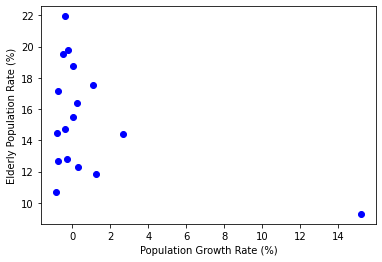

In [11]:
# 지역별 인구증가율, 고령인구비율 시각화
import matplotlib.pyplot as plt
population_inc = [0.3, -0.78, 1.26, 0.03, 1.11, 15.17, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
population_old = [12.27, 14.44, 11.87, 18.75, 17.52, 9.29, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]
plt.plot(population_inc,population_old,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

위 그래프는 2018년 지역별 인구증가율과 고령인구 비율을 시각화한 것이다. 오른쪽 아래에 멀리 떨어진 점은 일반적인 경향에서 벗어나는 사례로 보고 극단치라고 한다. 데이터의 일반적인 경향 파악을 위해 극단치는 제거해야 한다. 아래의 그래프는 극단치를 제거한 그래프이다. 

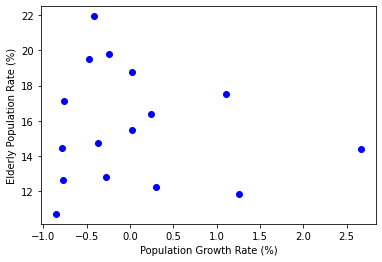

In [12]:
# 극단치를 제거한 지역별 인구증가율, 고령인구비율 시각화
import matplotlib.pyplot as plt
population_inc = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
population_old = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]
plt.plot(population_inc,population_old,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

데이터의 경향성을 가장 잘 설명하는 하나의 직선과 각 데이터의 차이를 잔차라고 한다. 잔차의 제곱을 최소화하는 알고리즘을 최소제곱법이라 한다.

최소제곱법을 통해 y = ax + b 의 기울기와 y절편을 구할 수 있다. 아래의 수식을 통해 a와 b를 구할 수 있다.


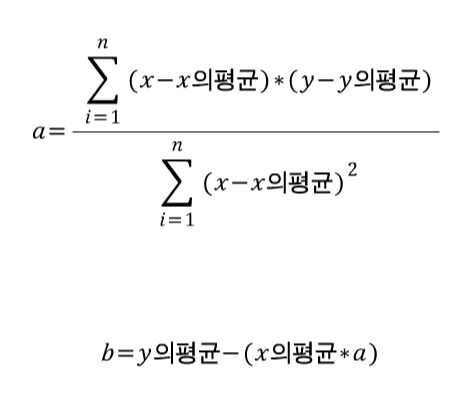

X를 인구 증가율, Y를 고령인구비율로 하여 최소제곱법을 통해 회귀선을 구하였다. python 함수인 sum(), len()을 사용해 X, Y의 평균을 구하였다. 최소제곱법으로 a와 b의 값을 구하는데 a를 구할때 사용된 zip 메서드는 두개 이상의 리스트를 하나로 묶어준다. 

그래프를 보면 X의 값이 증가하면 Y의 값이 감소하는 경향을 볼 수 있다. 즉 인구 증가율이 증가하면 고령 인구비율은 감소하게 된다.

a: -0.355834147915461 b: 15.669317743971302


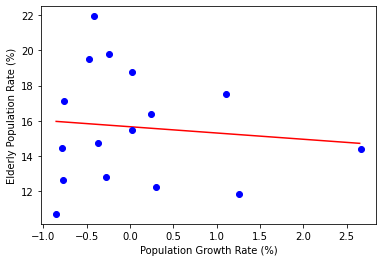

In [17]:
# 최소제곱법으로 회귀선 구하기
import numpy as np
import matplotlib.pyplot as plt
X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

# X, Y 평균
x_bar = sum(X) / len(X)
y_bar = sum(Y) / len(Y)

# 최소제곱법으로 a,b 값 구하기
a = sum([(x - x_bar) * (y - y_bar) for x, y in zip(X,Y)]) / sum([(x - x_bar) ** 2 for x in X])
b = y_bar - (x_bar * a)
print('a:', a, 'b:', b)

# 회귀선 및 극단치 제거한 지역별 인구증가율과 고령인구비율 시각화
line_x = np.arange(min(X),max(X),0.01)
line_y = a * line_x + b

plt.plot(line_x,line_y,'r-')

plt.plot(X,Y,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()


위 회귀선은 tensorflow를 사용하여 구할 수 있다. a와 b의 값을 랜덤으로 초기화 한다. loss를 구하기 위해 실제출력과 기대출력의 차인 잔차를 구한 후 잔차의 제곱을 모두 더해서 평균을 내서 loss를 구한다. 

loss를 최소화하는 것이 딥러닝과 머신러닝의 주요 알고리즘이므로 최적화 함수를 사용한다. 최적화 함수는 미분 계산 및 가중치 업데이트를 자동으로 해준다. 여기서는 Adam optimizer를 사용한다. Adam은 SGD와 함께 가장 자주 사용되는 최적화 함수이다. 적당함 학습률(learning rate)을 넣으면 Adam은 안정적이고 효율적으로 학습해 다른 최적화 함수보다 성능이 뛰어나다. 학습률은 0.1 ~ 0.0001 사이의 값을 사용한다. 

반복문을 통해 optimizer.minimize() 함수를 1000번 실행시켜 학습한다. 첫번째 파라미터는 최소화할 손실을 넣고, 두번째 파라미터에 학습시킬 변수인 a와 b를 넣는다. 학습을 거치면 a와 b는 잔차 제곱의 평균을 최소화하는 적절한 값에 도달한다. minimize 함수에 대해 이해하고 싶어 구글링을 겁나 해봤지만 나오는게 없다. 알려줄 사람 구합니다.

Adam 알고리즘 설명 사이트: https://velog.io/@minjung-s/Optimization-Algorithm

99 a: 0.10026725 b: 7.144618 loss: 82.282745
199 a: -0.1360536 b: 11.544786 loss: 26.7531
299 a: -0.2683951 b: 14.028171 loss: 12.46792
399 a: -0.32763037 b: 15.139956 loss: 10.060377
499 a: -0.3484958 b: 15.531584 loss: 9.79973
599 a: -0.35430175 b: 15.640556 loss: 9.781628
699 a: -0.3555795 b: 15.664544 loss: 9.780826
799 a: -0.35580114 b: 15.668698 loss: 9.780804
899 a: -0.35583073 b: 15.669257 loss: 9.780804
999 a: -0.3558333 b: 15.669303 loss: 9.780805


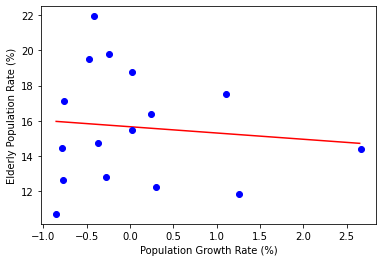

In [19]:
# tensorflow를 사용한 회귀선 구하기
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]
# a, b 랜덤 값으로 초기화
a = tf.Variable(random.random())
b = tf.Variable(random.random())

# 잔차 제곱 평균 반환 함수 
def compute_loss():
  y_pred = a * X + b
  loss = tf.reduce_mean((Y - y_pred) ** 2) # 차원을 감소하면서 평균을 구하는 메서드
  return loss

optimizer = tf.keras.optimizers.Adam(learning_rate=0.07)

# 잔차 제곱 평균의 최소화
for i in range(1000):
  optimizer.minimize(compute_loss, var_list=[a,b]) 

  if i % 100 == 99:
    print(i, 'a:', a.numpy(), 'b:', b.numpy(), 'loss:', compute_loss().numpy())

# 회귀선 및 극단치 제거한 지역별 인구증가율과 고령인구비율 시각화
line_x = np.arange(min(X),max(X),0.01)
line_y = a * line_x + b

plt.plot(line_x,line_y,'r-')

plt.plot(X,Y,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

# 4.2 다항 회귀

선형 회귀로 표현할 수 없는 데이터의 경향성을 설명하기 위해 비선형 회귀를 사용하는데, 이 중 2차 함수, 3차 함수 등의 곡선이 되는 것입니다. 

랜덤변수 c를 추가하여 ax^2 + bx + c 형태의 이차함수를 회귀선으로 구하였다. 직선 회귀선보다 loss 값이 감소함을 알 수 있다.

99 a: -0.1701016 b: -0.1615103 loss: c: 15.505493 loss: 9.704678
199 a: -0.55665743 b: 0.46346107 loss: c: 16.086756 loss: 9.456213
299 a: -0.5645495 b: 0.476159 loss: c: 16.098675 loss: 9.456111
399 a: -0.56462663 b: 0.47628352 loss: c: 16.098791 loss: 9.45611
499 a: -0.56462675 b: 0.47628397 loss: c: 16.098791 loss: 9.456111
599 a: -0.56462675 b: 0.47628397 loss: c: 16.098791 loss: 9.456111
699 a: -0.56462675 b: 0.47628397 loss: c: 16.098791 loss: 9.456111
799 a: -0.56462675 b: 0.47628397 loss: c: 16.098791 loss: 9.456111
899 a: -0.56462675 b: 0.47628397 loss: c: 16.098791 loss: 9.456111
999 a: -0.56462675 b: 0.47628397 loss: c: 16.098791 loss: 9.456111


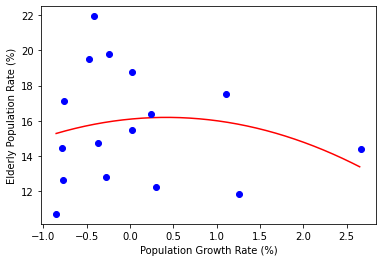

In [21]:
# tensorflow를 사용한 회귀선 구하기
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]
# a, b, c 랜덤 값으로 초기화
a = tf.Variable(random.random())
b = tf.Variable(random.random())
c = tf.Variable(random.random())

# 잔차 제곱 평균 반환 함수 
def compute_loss():
  y_pred = a * X * X + b * X + c
  loss = tf.reduce_mean((Y - y_pred) ** 2) # 차원을 감소하면서 평균을 구하는 메서드
  return loss

  optimizer = tf.keras.optimizers.Adam(learning_rate=0.07)

# 잔차 제곱 평균의 최소화
for i in range(1000):
  optimizer.minimize(compute_loss, var_list=[a,b,c]) 

  if i % 100 == 99:
    print(i, 'a:', a.numpy(), 'b:', b.numpy(), 'loss:','c:', c.numpy(), 'loss:', compute_loss().numpy())

# 회귀선 및 극단치 제거한 지역별 인구증가율과 고령인구비율 시각화
line_x = np.arange(min(X),max(X),0.01)
line_y = a * line_x * line_x + b * line_x + c

plt.plot(line_x,line_y,'r-')

plt.plot(X,Y,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

랜덤변수 d를 추가하여 ax^3 + bx^2 + cx + d 형태의 삼차함수를 회귀선으로 구하였다. 직선, 2차함수 회귀선에 비해 loss 값이 늘어남을 알 수 있다. 차원을 늘리거나 비선형 회귀를 적용해 회귀선을 구할 수 있지만 어느 것이 적절한지 바로 알기 어렵다. 그래서 식을 계속 바꿔보면서 최적의 회귀선을 찾아야 한다.

99 a: -5.4507494 b: 17.875673 loss: c: -3.606178 loss: d: 0.6912456 loss: 124.17294
199 a: -5.637024 b: 18.300194 loss: c: -3.4459474 loss: d: 0.6912456 loss: 124.12941
299 a: -5.6381893 b: 18.30274 loss: c: -3.4446905 loss: d: 0.6912456 loss: 124.12939
399 a: -5.6381893 b: 18.30274 loss: c: -3.4446933 loss: d: 0.6912456 loss: 124.129395
499 a: -5.6381893 b: 18.30274 loss: c: -3.4446933 loss: d: 0.6912456 loss: 124.129395
599 a: -5.6381893 b: 18.30274 loss: c: -3.4446933 loss: d: 0.6912456 loss: 124.129395
699 a: -5.6381893 b: 18.30274 loss: c: -3.4446933 loss: d: 0.6912456 loss: 124.129395
799 a: -5.6381893 b: 18.30274 loss: c: -3.4446933 loss: d: 0.6912456 loss: 124.129395
899 a: -5.63819 b: 18.30274 loss: c: -3.4446933 loss: d: 0.6912456 loss: 124.129395
999 a: -5.63819 b: 18.30274 loss: c: -3.4446933 loss: d: 0.6912456 loss: 124.129395


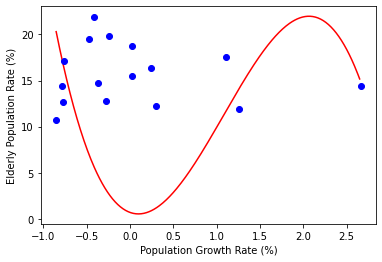

In [24]:
# tensorflow를 사용한 회귀선 구하기
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]
# a, b, c 랜덤 값으로 초기화
a = tf.Variable(random.random())
b = tf.Variable(random.random())
c = tf.Variable(random.random())
d = tf.Variable(random.random())

# 잔차 제곱 평균 반환 함수 
def compute_loss():
  y_pred = a * X * X * X + b * X * X + c * X + d
  loss = tf.reduce_mean((Y - y_pred) ** 2) # 차원을 감소하면서 평균을 구하는 메서드
  return loss

  optimizer = tf.keras.optimizers.Adam(learning_rate=0.07)

# 잔차 제곱 평균의 최소화
for i in range(1000):
  optimizer.minimize(compute_loss, var_list=[a,b,c,]) 

  if i % 100 == 99:
    print(i, 'a:', a.numpy(), 'b:', b.numpy(), 'loss:','c:', c.numpy(), 'loss:','d:', d.numpy(), 'loss:', compute_loss().numpy())

# 회귀선 및 극단치 제거한 지역별 인구증가율과 고령인구비율 시각화
line_x = np.arange(min(X),max(X),0.01)
line_y = a * line_x * line_x * line_x + b * line_x * line_x + c * line_x + d

plt.plot(line_x,line_y,'r-')

plt.plot(X,Y,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

# 4.3 딥러닝 네트워크를 이용한 회귀

앞서 나온 선형, 비선형, 다항회귀가 아닌 tensorflow를 통해 만든 딥러닝 네트워크를 이용해 회귀선을 구할 수 있다.

아래 모델은 2개의 Dense로 구성된다. 첫 번째 Dense layer는 활성화 함수로 tanh를 사용한다. tanh는 하이퍼볼릭 탄젠트 함수로 실수 입력을 받아 -1에서 1 사이의 값을 반환한다.
아래 이미지는 tanh의 함수의 수식이다.


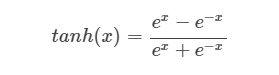

첫 번째 layer에는 6개의 뉴런을 할당했다. 뉴런이 많을수록 딥러닝 네트워크의 표현력이 좋아지지만 너무 많을 경우 과적합된다. 두 번째 layer에는 X 입력값에 대한 하나의 Y 값만 출력해야 하므로 뉴런의 개수는 1개다. 

loss는 mse로 잔차의 제곱의 평균이 되므로 앞선 선형 회귀, 다항 회귀와 동일하게 잔차를 줄이는 방향으로 학습한다.

In [45]:
# 딥러닝 네트워크를 이용한 회귀
import tensorflow as tf
import numpy as np
X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

# 모델 생성
model = tf.keras.Sequential([
  tf.keras.layers.Dense(units = 6,activation = 'tanh', input_shape=(1,)),
  tf.keras.layers.Dense(units = 1)
])

model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.1),loss='mse')

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 6)                 12        
                                                                 
 dense_9 (Dense)             (None, 1)                 7         
                                                                 
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


10회 학습시킬 때 9, 10 에포크에서 loss가 거의 변하지 않는다고 하여 에포크를 100으로 하여 에포크를 100으로 하여 학습을 해보았다. 계속해서 값이 감소하기는 하였지만 손실의 변화가 일정하게 일어나는 것으로 보아 10회 학습하면 모델이 충분히 학습되었다고 할 수 있다. 학습을 너무 많이 하게 되면 모델이 과적홥되어 새로운 데이터가 들어왔을 때 적절한 값을 찾지 못한다. 

In [46]:
# 모델 학습의 반복 횟수에 따른 loss 차이 확인
model.fit(X,Y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 278ms/step - loss: 254.0024
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 139.1766
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 20.4087
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 10.2320
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 9.6914
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 9.6417
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 9.6278
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 9.6202
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 9.6137
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 9.6070
Epoch 11/100
1/1 [==============================] - 0s 10ms/step - loss: 9.5999
Epoch 12/100
1/1 [==============================] - 0s 9ms/step - loss: 9.5921
Epoch 13/100
1/1 [==============================] 

In [59]:
# 모델 초기화
import tensorflow as tf
import numpy as np
X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

model = tf.keras.Sequential([
  tf.keras.layers.Dense(units = 6,activation = 'tanh', input_shape=(1,)),
  tf.keras.layers.Dense(units = 1)
])

model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.1),loss='mse')

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 6)                 12        
                                                                 
 dense_15 (Dense)            (None, 1)                 7         
                                                                 
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


In [60]:
# 적절한 반복횟수로 모델 학습
model.fit(X,Y,epochs=10)

Epoch 1/10
1/1 [==============================] - 0s 274ms/step - loss: 255.5264
Epoch 2/10
1/1 [==============================] - 0s 8ms/step - loss: 93.4866
Epoch 3/10
1/1 [==============================] - 0s 11ms/step - loss: 11.6148
Epoch 4/10
1/1 [==============================] - 0s 8ms/step - loss: 9.7539
Epoch 5/10
1/1 [==============================] - 0s 6ms/step - loss: 9.4904
Epoch 6/10
1/1 [==============================] - 0s 7ms/step - loss: 9.4422
Epoch 7/10
1/1 [==============================] - 0s 8ms/step - loss: 9.4129
Epoch 8/10
1/1 [==============================] - 0s 10ms/step - loss: 9.3833
Epoch 9/10
1/1 [==============================] - 0s 12ms/step - loss: 9.3517
Epoch 10/10
1/1 [==============================] - 0s 10ms/step - loss: 9.3181


In [61]:
# 모델 성능 확인
model.predict(X)

array([[16.03612  ],
       [15.571672 ],
       [15.12904  ],
       [16.066313 ],
       [15.329617 ],
       [16.052336 ],
       [15.989807 ],
       [15.8485775],
       [15.581755 ],
       [15.9178505],
       [15.499592 ],
       [15.891521 ],
       [15.975117 ],
       [16.065338 ],
       [15.591778 ],
       [13.668861 ]], dtype=float32)

그래프를 통해 회귀선을 확인해보면 2차함수를 회귀선으로 했던 그래프와 비슷하다. 교재와 달리 직선의 형태가 아닌 곡선과 가까운 형태를 보이는데 랜덤한 값으로 모델의 학습이 시작되므로 다른 형태가 나왔다.



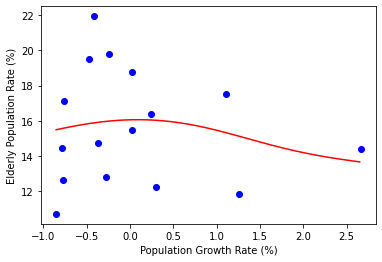

In [62]:
# 딥러닝 네트워크 회귀선
import matplotlib.pyplot as plt
import numpy as np

line_x = np.arange(min(X),max(X),0.01)
line_y = model.predict(line_x)

plt.plot(line_x,line_y,'r-')

plt.plot(X,Y,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()


뉴런의 개수에 따른 모델의 성능차이를 비교하기 위해 첫 번째 layer의 뉴런의 개수를 두 배로 하여 성능을 확인해보았다.


In [18]:
# 뉴런의 개수에 따른 모델의 성능 차이
import tensorflow as tf
import numpy as np
X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

model = tf.keras.Sequential([
  # 첫 번째 layer 뉴런의 개수 두 배로 증가                             
  tf.keras.layers.Dense(units = 12,activation = 'tanh', input_shape=(1,)),
  tf.keras.layers.Dense(units = 1)
])

model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.1),loss='mse')

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 12)                24        
                                                                 
 dense_7 (Dense)             (None, 1)                 13        
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


회귀선의 모양이 조금 달라지기는 하였으나 큰 차이가 없음을 보인다. 예상하기로 이 모델에서 뉴런의 개수는 너무 작은 값이 아니면 성능에 큰 영향을 미치지 않는 것으로 판단된다.


Epoch 1/10
1/1 [==============================] - 1s 505ms/step - loss: 254.9267
Epoch 2/10
1/1 [==============================] - 0s 11ms/step - loss: 91.7072
Epoch 3/10
1/1 [==============================] - 0s 9ms/step - loss: 42.8434
Epoch 4/10
1/1 [==============================] - 0s 10ms/step - loss: 42.0978
Epoch 5/10
1/1 [==============================] - 0s 10ms/step - loss: 19.7544
Epoch 6/10
1/1 [==============================] - 0s 14ms/step - loss: 16.0447
Epoch 7/10
1/1 [==============================] - 0s 8ms/step - loss: 12.2176
Epoch 8/10
1/1 [==============================] - 0s 9ms/step - loss: 10.9758
Epoch 9/10
1/1 [==============================] - 0s 8ms/step - loss: 10.0822
Epoch 10/10
1/1 [==============================] - 0s 10ms/step - loss: 9.7008


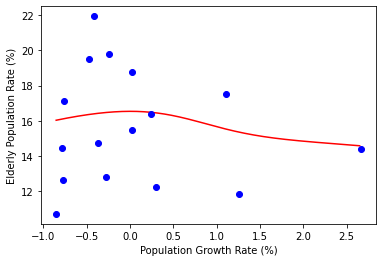

In [6]:
model.fit(X,Y,epochs=10)

import matplotlib.pyplot as plt
import numpy as np

line_x = np.arange(min(X),max(X),0.01)
line_y = model.predict(line_x)

plt.plot(line_x,line_y,'r-')

plt.plot(X,Y,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

# 4.4 보스턴 주택 가격 데이터세트

딥러닝 네트워크를 이용한 회귀를 통해 주택 가격 예측 네트워크를 만들었다. 데이터셋은 보스턴 주택 가격 데이터셋으로 회귀 문제의 대표적인 데이터셋이다. 

훈련 데이터는 학습할 때 사용되고 테스트 데이터는 학습 결과를 평가할 때 사용된다. 훈련 데이터의 일부를 검증 데이터로 만들어 학습이 잘 되는지 검증할 때 사용된다. 딥러닝 네트워크의 가중치를 학습하는 데이터는 훈련 데이터만 해당된다.

In [22]:
# 데이터 셋 불러오기
from tensorflow.keras.datasets import boston_housing
(train_x, train_y),(test_x, test_y) = boston_housing.load_data()

훈련 데이터는 404개, 테스트 데이터는 102개로 약 8:2의 비율이다. 검증 데이터는 보통 전체 데이터의 20% 정도 사용하므로 훈련, 검증, 테스트 데이터의 비율을 약 6:2:2 정도로 설정한다.

In [23]:
# 데이터 확인
print(len(train_x), len(test_x))
print(train_x[0])
print(train_y[0])

404 102
[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
15.2


데이터의 설명을 보면 각 데이터의 단위가 다르다. 이러한 데이터는 정규화하여 학습해야 효율이 좋다. 이 책에서 정규화라고 표현했지만 나는 책의 설명이 표준화라고 생각하여 표준화라고 표현하였다. 표준화란 평균을 0, 표준편차를 1로 하여 각 데이터의 값을 정규분포로 표현하여 학습 효율을 높이는 방법이다. 표준화를 위해 각 데이터에서 평균값을 뺀 다음 표준편차로 나눠준다.

In [24]:
# 데이터 전처리
# 훈련 데이터의 평균과 표준편차를 구한 후 훈련 데이터와 테스트 데이터 표준화
x_mean = train_x.mean(axis = 0)
x_std = train_x.std(axis = 0)
train_x -= x_mean
train_x /= x_std
test_x -= x_mean
test_x /= x_std

y_mean = train_y.mean(axis = 0)
y_std = train_y.std(axis = 0)
train_y -= y_mean
train_y /= y_std
test_y -= y_mean
test_y /= y_std

print(train_x[0])
print(train_y[0])

[-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
  0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
  0.8252202 ]
-0.7821526033779157


feature의 수와 데이터의 양이 많기 때문에 4개의 layer를 사용했으며, 각 layer에 들어가는 뉴런의 수도 늘렸다. layer의 수와 은닉층의 뉴런의 수를 늘리면 모델의 표현력이 좋아진다. 첫 번째 layer의 input_shape는 모든 feature를 불러오기 위해 첫 번째 차원의 수를 13으로 설정했고 마지막 layer는 주택 가격만 예측하면 되므로 뉴런의 수가 1개이다.

활성화 함수는 relu를 사용했다. 앞선 장에서도 설명했듯이 relu는 y = x의 음수 부분은 0으로 한다. 여러 개의 layer를 겹처서 모델을 만들때는 시그모이드, tanh보다 좋은 결과를 얻는다.

In [10]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=52, activation='relu', input_shape=(13,)),
  tf.keras.layers.Dense(units=39, activation='relu'),                              
  tf.keras.layers.Dense(units=26, activation='relu'),
  tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.07),loss = 'mse')

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 52)                728       
                                                                 
 dense_3 (Dense)             (None, 39)                2067      
                                                                 
 dense_4 (Dense)             (None, 26)                1040      
                                                                 
 dense_5 (Dense)             (None, 1)                 27        
                                                                 
Total params: 3,862
Trainable params: 3,862
Non-trainable params: 0
_________________________________________________________________


validation_split은 검증 데이터의 비율을 정하는 파라미터로 훈련 데이터의 25% 정도를 검증 데이터로 하였다. 에포크를 보면 loss와 val_loss가 함께 표시된다. loss는 감소 추세를 보이는 반면 val_loss는 일정 수치 이하의 값에서 감소하고 증가하고를 반복한다.

In [11]:
# 모델 학습
history = model.fit(train_x, train_y, epochs=25, batch_size=32, validation_split=0.25)

Epoch 1/25
10/10 [==============================] - 1s 19ms/step - loss: 2.6033 - val_loss: 0.8707
Epoch 2/25
10/10 [==============================] - 0s 6ms/step - loss: 0.4786 - val_loss: 0.4819
Epoch 3/25
10/10 [==============================] - 0s 5ms/step - loss: 0.4130 - val_loss: 0.3960
Epoch 4/25
10/10 [==============================] - 0s 6ms/step - loss: 0.2520 - val_loss: 0.2320
Epoch 5/25
10/10 [==============================] - 0s 5ms/step - loss: 0.1976 - val_loss: 0.2179
Epoch 6/25
10/10 [==============================] - 0s 6ms/step - loss: 0.1798 - val_loss: 0.2535
Epoch 7/25
10/10 [==============================] - 0s 6ms/step - loss: 0.1617 - val_loss: 0.1765
Epoch 8/25
10/10 [==============================] - 0s 6ms/step - loss: 0.1516 - val_loss: 0.2338
Epoch 9/25
10/10 [==============================] - 0s 5ms/step - loss: 0.1629 - val_loss: 0.1876
Epoch 10/25
10/10 [==============================] - 0s 6ms/step - loss: 0.1688 - val_loss: 0.2027
Epoch 11/25
10/10 

<function matplotlib.pyplot.show>

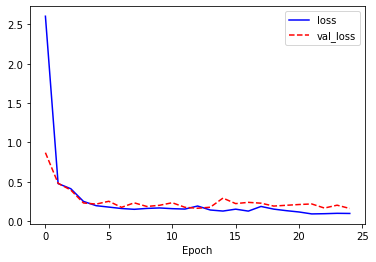

In [12]:
# 모델 학습 결과 시각화
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],'b-',label='loss')
plt.plot(history.history['val_loss'],'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend() # 그래프 범례 추가
plt.show

테스트 데이터의 loss는 0.3341이 나오는데 이는 훈련 데이터가 보여주는 0.8보다 더 낮은 수치이다. 사실 이 설명이 잘 이해가 되지 않는다. 설명해주실 분 구합니다. 그래프를 보고 훈련 데이터가 보여주는 수치를 확인하는데 어느 부분을 말하는지 모르겠습니다.

In [14]:
# 모델 평가
print(model.evaluate(train_x,train_y))
model.evaluate(test_x,test_y)

13/13 [==============================] - 0s 1ms/step - loss: 0.0982
0.09823097288608551
4/4 [==============================] - 0s 3ms/step - loss: 0.3341


0.3340843915939331

실제 주택 가격과 예측 주택 가격은 비슷한 모습을 보이지만 학습이 잘 되었다고 보기에는 부족하다.

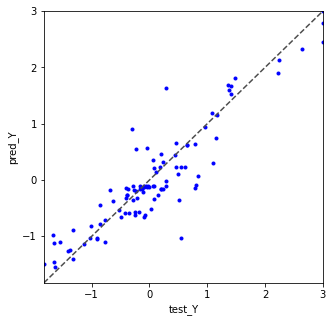

In [17]:
# 실제 주택 가격과 예측 주택 가격 시각화
import matplotlib.pyplot as plt

pred_Y = model.predict(test_x)

plt.figure(figsize=(5,5)) # 그래프 사이즈 설정
plt.plot(test_y, pred_Y, 'b.')
plt.axis([min(test_y),max(test_y),min(test_y),max(test_y)]) # 그래프 축 설정

plt.plot([min(test_y),max(test_y)],[min(test_y),max(test_y)], ls='--',c=".3")
plt.xlabel('test_Y')
plt.ylabel('pred_Y')

plt.show()

검증 데이터, 테스트 데이터에 대해 모두 좋은 예측 성능을 보이기 위해서는 val_loss가 높아지지 않도록, 즉 네트워크가 훈련 데이터에 과적합되지 않도록 중간에 멈춰야 한다. 이를 하기 위해서는 콜백 함수를 사용하면 된다. fit 함수의 callback 파라미터를 통해 설정 가능하다.

콜백 함수를 살펴보면 EarlyStopping은 일찍 기능을 멈추는 함수로 patience는 몇 번의 에포크를 기준으로 삼을 것인지, monitor은 어떤 값을 지켜볼지에 대한 파라미터입니다. 3회의 에포크를 수행하는 동안 val_loss가 최고 기록을 갱신하지 못하면 학습을 종료하기 때문에 에포크 6,7,8의 val_loss가 에포크 5의 val_loss보다 작으므로 학습이 종료되었다.

In [30]:
# 4.18 모델 재정의 및 학습
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=52, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(units=39, activation='relu'),
    tf.keras.layers.Dense(units=26, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.07), loss='mse')

history = model.fit(train_x, train_y, epochs=25, batch_size=32, validation_split=0.25, 
                    callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss')])

Epoch 1/25
10/10 [==============================] - 1s 16ms/step - loss: 1.9592 - val_loss: 0.8048
Epoch 2/25
10/10 [==============================] - 0s 7ms/step - loss: 0.3534 - val_loss: 0.4681
Epoch 3/25
10/10 [==============================] - 0s 6ms/step - loss: 0.2867 - val_loss: 0.4327
Epoch 4/25
10/10 [==============================] - 0s 6ms/step - loss: 0.2302 - val_loss: 0.3602
Epoch 5/25
10/10 [==============================] - 0s 6ms/step - loss: 0.1995 - val_loss: 0.3290
Epoch 6/25
10/10 [==============================] - 0s 7ms/step - loss: 0.1843 - val_loss: 0.3292
Epoch 7/25
10/10 [==============================] - 0s 6ms/step - loss: 0.1724 - val_loss: 0.3632
Epoch 8/25
10/10 [==============================] - 0s 5ms/step - loss: 0.1730 - val_loss: 0.3827


val_loss의 변화를 이전 모델과 비교하였을 때 증가추세가 잘 보이지 않는다.

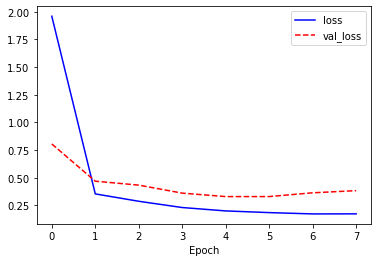

In [32]:
# 콜백 함수 사용한 모델 학습 결과 시각화
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

이전 모델의 loss인 0.3341에 비해 낮은 0.1796이 나온다. 모델 학습이 더 잘 되었다고 볼 수 있다.

In [34]:
# 콜백 함수 사용 모델 평가
model.evaluate(test_x,test_y)

4/4 [==============================] - 0s 3ms/step - loss: 0.1796


0.17963089048862457

이전 그래프의 결과에 비해 예측값이 대각선에 가까워졌다. 콜백 함수를 사용하면 네트워크의 과적합을 막아 성능을 높일 수 있다.

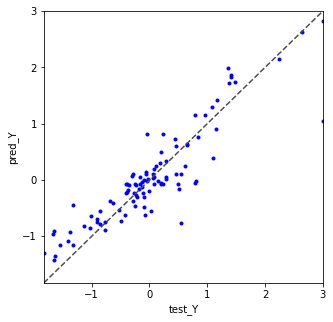

In [36]:
# 콜백 함수 모델 실제 주택 가격과 예측 주택 가격 시각화
import matplotlib.pyplot as plt

pred_Y = model.predict(test_x)

plt.figure(figsize=(5,5))
plt.plot(test_y, pred_Y, 'b.')
plt.axis([min(test_y), max(test_y), min(test_y), max(test_y)])

plt.plot([min(test_y), max(test_y)], [min(test_y), max(test_y)], ls="--", c=".3")
plt.xlabel('test_Y')
plt.ylabel('pred_Y')

plt.show()